### lecture 19 - keras library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
m = 2
b = 3
x = np.linspace(0,50,100)

In [3]:
np.random.seed(101)

In [4]:
noise = np.random.normal(loc=0,scale=4,size=len(x))

In [5]:
y = 2*x + b + noise

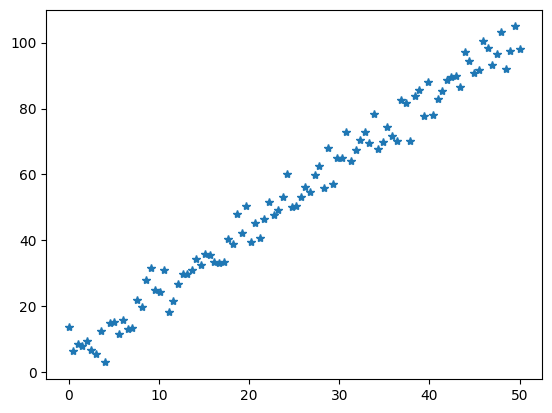

In [6]:
plt.plot(x,y,'*')

In [7]:
from keras.models import Sequential # type: ignore

In [8]:
from keras.layers import Dense # type: ignore

In [9]:
# 4 neurons, expecting only 1 feature with input_dim=1
model = Sequential()
# 4 neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# one final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# compil the layers
model.compile(loss='mse', optimizer='adam')

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(x,y,epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2817.0925
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2852.9402
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2754.3567
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2792.5803
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2756.7754 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2707.2087
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2736.5637 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2786.7349 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2646.6050
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2668.3767
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2708.5981
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2529.7424
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2637.4570 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2544.5603 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 

In [12]:
loss = model.history.history['loss']

In [13]:
epochs = range(len(loss))

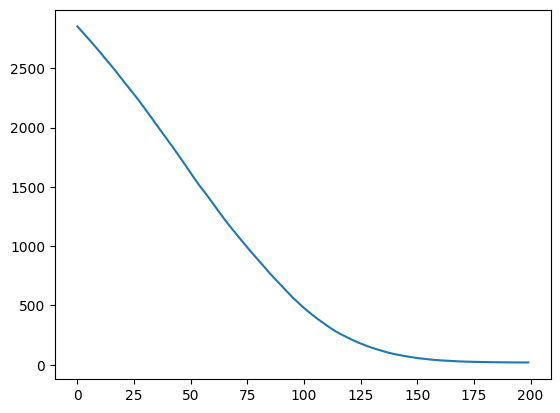

In [14]:
plt.plot(epochs,loss)

#### predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [15]:
x_for_predictions = np.linspace(0,50,100)

In [16]:
y_pred = model.predict(x_for_predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


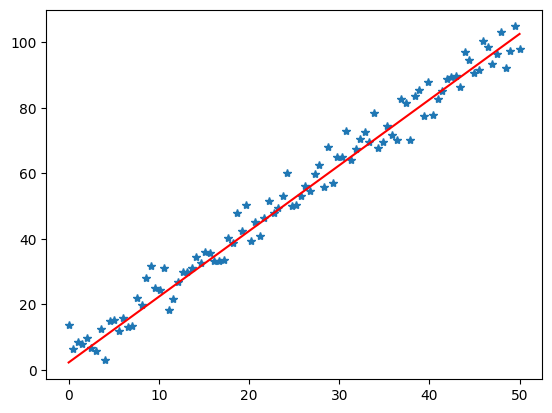

In [17]:
plt.plot(x,y,'*')
plt.plot(x_for_predictions,y_pred,'r')

#### model evaluation

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
prediction_for_true_y = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [23]:
mean_squared_error(y,prediction_for_true_y)

18.729216663378544

In [22]:
mean_absolute_error(y,prediction_for_true_y)

3.5325382916530246